In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.preprocessing import LabelBinarizer
import pickle

In [2]:
def show_history():
    # Lấy giá trị accuracy và loss từ history
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))

    # Biểu đồ cho độ chính xác
    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Biểu đồ cho mất mát
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Hiển thị biểu đồ
    plt.show()

In [5]:
def time_start(file):
    print(file)
    file_tsv='training_data/'+((file.split('_')[3]+'_'+file.split('_')[4])[:-3]+'tsv')
    # Đọc tệp TSV bằng pandas
    print(file_tsv)
    df = pd.read_csv(file_tsv, delimiter='\t')
    df=df.iloc
    df0 = df[:,0]
    df2 = df[:,2]
    for i in range(len(df2)):
        if(df2[i]==1):
            time = df0[i]
            break
    return df0[i]


def show_spectrogram (file,n_fft,n_mels,hop_lenght):
    time = time_limit
    audio, sr = librosa.load(file,sr=4000,offset= time_start(file) )
    audio = audio[sr*time:sr*time*2]
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr,n_fft= n_fft,n_mels=n_mels,hop_length=hop_lenght)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram ,ref=np.max)
    print(mel_spectrogram_db.shape)
    fig, ax = plt.subplots(figsize=(5,2))
    a =librosa.display.specshow(mel_spectrogram_db,
                            x_axis='time',
                            y_axis='linear',
                            sr=sr,
                            hop_length=512,
                            )
    plt.title("Audio Spectrogram Representation")
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel("Time(s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()


In [6]:
""" 
/training_data_all
        --->Unknown
        --->Absent
        --->Present
"""

' \n/training_data_all\n        --->Unknown\n        --->Absent\n        --->Present\n'

In [49]:
def get_label(label):
    # print(folders)
    y_data.append(label)

def create_data (audio,n_fft,n_mels,hop_length):
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr,n_fft= n_fft ,n_mels=n_mels,hop_length=hop_length)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram ,ref=np.max)
    w,h= mel_spectrogram_db.shape
    mel_spectrogram_db = mel_spectrogram_db.reshape([w,h,1])
    x_data.append(mel_spectrogram_db)

def get_date(name_files,file,time_limit,sr):

    audio, sr = librosa.load(name_files, sr=sr,offset= time_start(file))
    # file = file[:-4]
    segment_length = time_limit * sr
    num_segments = (len(audio) // segment_length)
    for i in range(num_segments):
        start_sample = i * segment_length
        end_sample = (i + 1) * segment_length
        segment = audio[start_sample:end_sample]

        create_data(segment,n_fft,n_mels,hop_length)

        label = name_files.split('/')[1]
        get_label(label)

training_data/49970_MV.tsv
(128, 64)


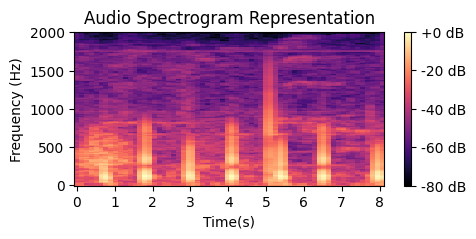

training_data/68374_MV.tsv
(128, 64)


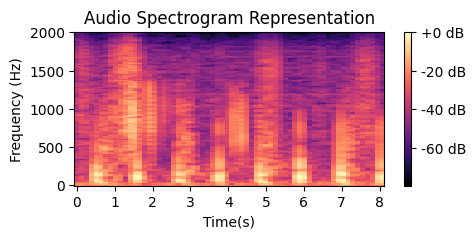

training_data/85081_MV.tsv
(128, 64)


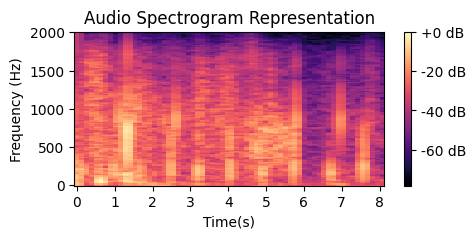

In [47]:
time_limit = 2
sr = 4000
n_fft = 512
n_mels= 128
hop_length = 126
def show (n_fft ,n_mels,hop_lenght,time_limit):
    audio_file_absent = "training_data_all/Absent/0.04025_49970_MV.wav"
    audio_file_present = "training_data_all/Present/0.16025_68374_MV.wav"
    audio_file_unknown = "training_data_all/Unknown/0.83_85081_MV.wav"
    show_spectrogram(audio_file_absent,n_fft= n_fft ,n_mels=n_mels,hop_lenght=hop_lenght)
    show_spectrogram(audio_file_present,n_fft= n_fft ,n_mels=n_mels,hop_lenght=hop_lenght)
    show_spectrogram(audio_file_unknown,n_fft= n_fft ,n_mels=n_mels,hop_lenght=hop_lenght)
show(n_fft,n_mels,hop_length,time_limit)

In [50]:
data_train = 'training_data_all'

x_data = []
y_data = []

for folders in os.listdir(data_train):
    print(folders)
    name_folders = os.path.join(data_train,folders)
    for file in os.listdir(name_folders):
        name_files = os.path.join(name_folders,file)
        get_date(name_files,file,time_limit = time_limit,sr = 4000)

file = open('data_file.csv','wb')
pickle.dump((x_data,y_data),file)
file.close()

Unknown
7.4005_85043_PV.wav


IndexError: list index out of range

In [4]:
file = open('data_file.csv', 'rb')
data = pickle.load(file)
x_data,y_data =data
file.close()
x_data=np.array(x_data)
y_data = np.array(y_data)

print(x_data.shape)
print(y_data.shape)

(34558, 64, 64, 1)
(34558,)


In [5]:
x_test = []
y_test = []
x_train = []
y_train = []

In [6]:
encoder = LabelBinarizer()
y_data=encoder.fit_transform(y_data)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=68)

for train_index, test_index in sss.split(x_data, y_data):
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]

In [7]:
input_shape = x_test[1].shape
print(input_shape)

(64, 64, 1)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

model = Sequential()

model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2), padding='same'))

model.add(Conv2D(128, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2), padding='same'))

model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2), padding='same'))

model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))


model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])

model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.summary()


2023-11-01 15:01:44.087344: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 15:01:44.087380: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 15:01:44.087781: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 15:01:44.132910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       819456    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 256)         0

2023-11-01 15:01:46.626632: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 15:01:46.637552: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-01 15:01:46.637906: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/2


2023-11-01 15:01:50.311752: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-01 15:01:51.995942: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3c00003970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-01 15:01:51.995975: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-11-01 15:01:52.005618: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-01 15:01:52.090590: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


756/756 [==============================] - ETA: 0s - loss: 0.1584 - accuracy: 0.7623
Epoch 1: val_accuracy improved from -inf to 0.76244, saving model to best_model.h5
756/756 [==============================] - 18s 16ms/step - loss: 0.1584 - accuracy: 0.7623 - val_loss: 0.1584 - val_accuracy: 0.7624
Epoch 2/2
  1/756 [..............................] - ETA: 9s - loss: 0.1875 - accuracy: 0.7188

/home/duyphuoc/Desktop/heart_sound_new/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


755/756 [============================>.] - ETA: 0s - loss: 0.1583 - accuracy: 0.7625
Epoch 2: val_accuracy did not improve from 0.76244
756/756 [==============================] - 11s 15ms/step - loss: 0.1584 - accuracy: 0.7624 - val_loss: 0.1584 - val_accuracy: 0.7624


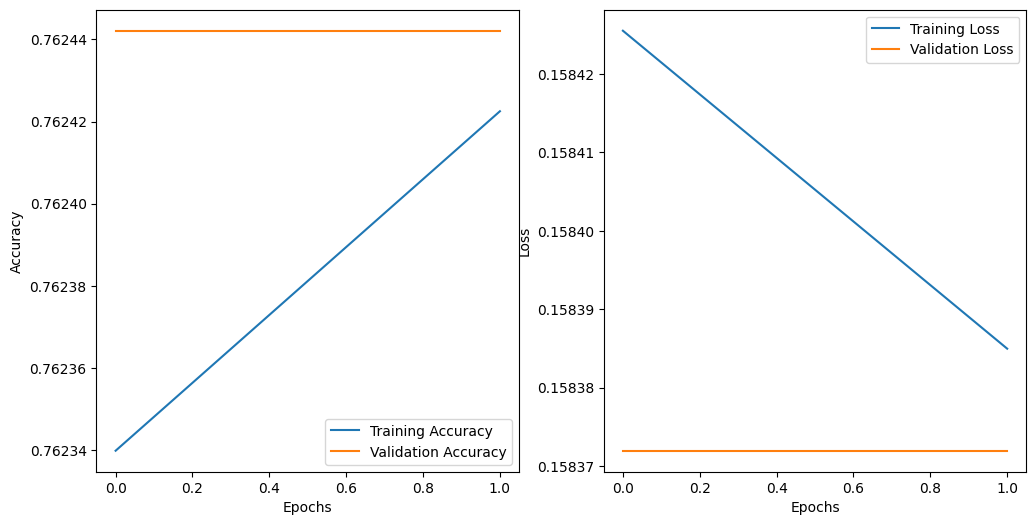

In [9]:
history = model.fit(x_train,y_train,batch_size=32, epochs=2,validation_data=(x_test, y_test), callbacks=[model_checkpoint])
show_history()